In [5]:
import pandas as pd
cust=pd.read_csv("C:/Users/Admin/Documents/Datasets/ML Tests/drive-download-20200607T023428Z-001/training_set.csv")
cust.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


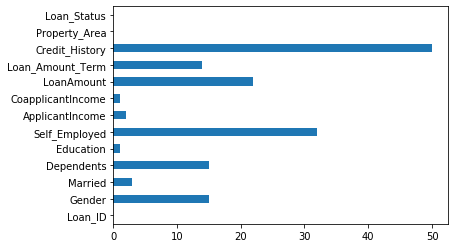

In [8]:
cust.isna().sum().plot(kind="barh")

In [13]:
cat = []
con = []
for i in cust.columns:
    if cust[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

# Missing Data Treatment for Continuous Variables:

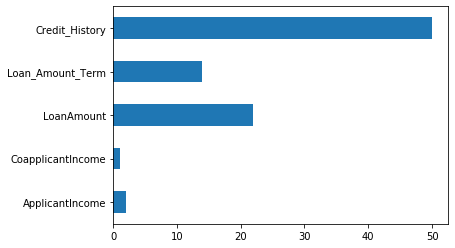

In [15]:
cust[con].isna().sum().plot(kind="barh")

In [19]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
A1 = pd.DataFrame(imp.fit_transform(cust[con]), columns=con)

# Missing Data Treatment for Categorical Variables:

In [39]:
# from sklearn_pandas import CategoricalImputer
cat_imp = SimpleImputer(strategy="most_frequent")
# cat.remove("Loan_ID")
# A2 = cust[cat].apply(cat_imp.fit_transform, columns=cat)
A2 = pd.DataFrame(cat_imp.fit_transform(cust[cat]), columns=cat)

In [41]:
A = A1.join(A2)

In [42]:
A.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.00000,0.0,146.412162,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,5405.54085,1508.0,128.000000,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000.00000,0.0,66.000000,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583.00000,2358.0,120.000000,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000.00000,0.0,141.000000,360.0,1.0,Male,No,0,Graduate,No,Urban,Y


# Naive Baye's

In [43]:
A.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
X = A.drop(labels=["Loan_Status"], axis=1)
y = A.Loan_Status

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
pred = model.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7723577235772358

In [53]:
from sklearn.

SyntaxError: invalid syntax (<ipython-input-53-f8934e568edb>, line 1)

In [2]:
from sklearn.cluster import KMeans
km = KMeans(random_state=30, n_clusters=4)
C = A[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
C["TotalIncome"] = C.ApplicantIncome + C.CoapplicantIncome
model = km.fit(C[["TotalIncome", "LoanAmount"]])
# print(model.cluster_centers_)
# print(model.labels_)
# print(model.inertia_)
import seaborn as sb
pd.DataFrame(model.labels_, columns=["Pred_Labels"])["Pred_Labels"].value_counts()
sb.scatterplot(C.ApplicantIncome, C.LoanAmount, hue=model.labels_)

NameError: name 'A' is not defined

In [62]:
WCSS = []
k =  range(2, 10, 1)
for i in k:
    km = KMeans(n_clusters=i)
    model = km.fit(C[["TotalIncome", "LoanAmount"]])
    WCSS.append(model.inertia_)

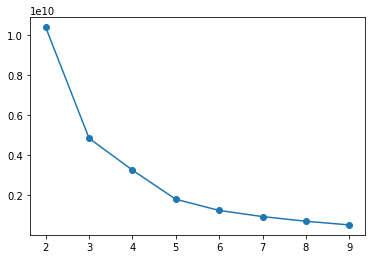

In [65]:
import matplotlib.pyplot as plt
plt.scatter(k, WCSS)
plt.plot(k, WCSS)

In [1]:
km = KMeans(random_state=30, n_clusters=5)
model = km.fit(C[["TotalIncome", "LoanAmount"]])
C["cluster_labels"] = model.labels_

NameError: name 'KMeans' is not defined

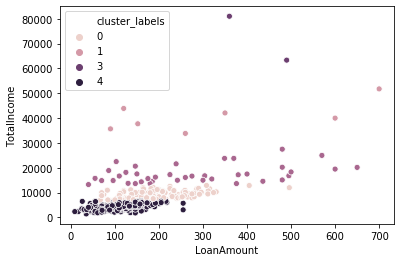

In [75]:
sb.scatterplot(C.LoanAmount, C.TotalIncome, hue=C.cluster_labels)

In [76]:
--- standardizing it will give even better results

SyntaxError: invalid syntax (<ipython-input-76-343dd9ce17ad>, line 1)

3.)    If customer is not eligible for the input required amount and duration:
        a.)    what can be amount for the given duration.
        b.)    if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
A["DurationInYears"] = A.Loan_Amount_Term/12
A_enc = A[cat].apply(le.fit_transform)
con.append("DurationInYears")
A_enc = A_enc.join(A[con])
A_enc = A_enc.loc[A_enc.Loan_Status == 1]
print(A_enc.shape)
A_enc.head()

(422, 19)


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,DurationInYears,DurationInYears,DurationInYears,DurationInYears,DurationInYears,DurationInYears,DurationInYears
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
5,1,1,2,0,1,2,1,5417.0,4196.0,267.000000,360.0,1.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0


In [110]:
X = A_enc.drop(labels=["LoanAmount"], axis=1)
y = A_enc.LoanAmount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

---------------------------- Lots of EDA ----------------------------

In [111]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(min_samples_split=7,random_state=30)
model = rfr.fit(X_train, y_train)
pred = model.predict(X_test)

In [114]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

35.06779006983606

In [116]:
A.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

# 3.)    If customer is not eligible for the input required amount and duration:
a.)    what can be amount for the given duration.
b.)    if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [ ]:
3-b  will be classification prblm...